In [7]:
# %pip install datasets
# %pip install numpy
# %pip install Pillow
# %pip install opencv-python
# %pip install json
# %pip install torch
# %pip install matplotlib
# %pip install albumentations

In [ ]:
from datasets import load_dataset
import numpy as np
from PIL import Image
import cv2
import json
import albumentations as A
import matplotlib.pyplot as plt
import pandas as pd


In [9]:
# dataset = load_dataset("naver-clova-ix/cord-v2", split="train")
# for sample in dataset:
#     print(sample["ground_truth"])

In [ ]:
class DatasetReceipt:
    def __init__(self, dataset_name="naver-clova-ix/cord-v2", split="train"):
        self.dataset = load_dataset(dataset_name, split=split)
        self.augment = A.Compose([
            A.HorizontalFlip(p=0.5),
            A.RandomBrightnessContrast(p=0.2),
            A.Rotate(limit=10, p=0.5)
        ])

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        sample = self.dataset[idx]
        image = self.preprocess_image(sample["image"])
        ground_truth = self.parse_ground_truth(sample["ground_truth"])
        
        # Extract menu items and total price
        menu_df, total_price = self.extract_receipt_data(ground_truth)
        
        return {
            "image": image,
            "menu_df": menu_df,      # DataFrame with columns: ['item_name', 'quantity', 'price']
            "total_price": total_price  # Float (e.g., 1591600.0)
        }

    def preprocess_image(self, image):
        """Resize, normalize, and augment image."""
        if isinstance(image, Image.Image):
            image = np.array(image)
        
        image = cv2.resize(image, (600, 600)) / 255.0
        image = self.augment(image=image)['image']
        return np.expand_dims(image, axis=0).astype(np.float32)

    def parse_ground_truth(self, ground_truth_str):
        """Parse JSON ground truth string."""
        try:
            return json.loads(ground_truth_str)
        except json.JSONDecodeError:
            return {}

    def extract_receipt_data(self, ground_truth):
        """Convert JSON labels into a DataFrame of menu items and total price."""
        menu_items = []
        
        # Extract menu items if they exist
        if "gt_parse" in ground_truth and "menu" in ground_truth["gt_parse"]:
            for item in ground_truth["gt_parse"]["menu"]:
                menu_items.append({
                    "item_name": item.get("nm", ""),
                    "quantity": item.get("cnt", ""),
                    "price": float(item.get("price", "0").replace(",", ""))
                })
        
        # Extract total price if it exists
        total_price = 0.0
        if "gt_parse" in ground_truth and "total" in ground_truth["gt_parse"]:
            total_price = float(
                ground_truth["gt_parse"]["total"].get("total_price", "0").replace(",", "")
            )
        
        return pd.DataFrame(menu_items), total_price

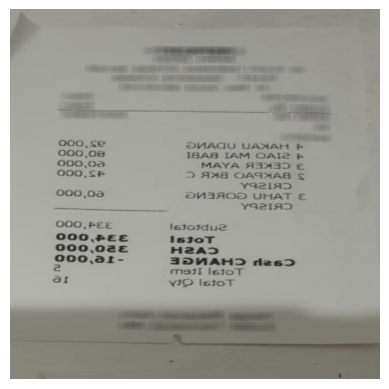

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


0oo se Ohaqu Uaaan ooo 08 18Aa LaM Oal2 o0o 00 Maya Aaaad 0oo SF aaa @aaaaa Ya2lad ooo 0o Ohaaoo UHAT Ya21a9 O0o,Fee leonduz 000,fee LbJot 000,02e H2az Ooo,a1 - aanah? d262 (iSL leot @[ 9 leoT


In [44]:
# %pip install easyocr
import easyocr

dataset = DatasetReceipt()
sample = dataset[2]["image"]  # Ambil gambar pertama

# Konversi ke NumPy jika masih dalam format PIL
if isinstance(sample, Image.Image):
    sample = np.array(sample)

# Plot gambar
plt.imshow(sample)
plt.axis("off")
plt.show()

reader = easyocr.Reader(['en', 'id'])
image_np = np.array(sample)
if image_np.dtype != np.uint8:
    image_np = (image_np * 255).astype(np.uint8)  # Normalisasi jika float64
results = reader.readtext(image_np)

# Combine all detected text into a single string
extracted_text = ' '.join([result[1] for result in results])

print(extracted_text)

In [ ]:
# class DatasetReceipt:
#     def __init__(self, dataset_name="naver-clova-ix/cord-v2", split="train"):
#         """
#         Parameters:
#         - dataset_name: Nama dataset dari Hugging Face (default: "naver-clova-ix/cord-v2").
#         - split: Split dataset yang akan digunakan (default: "train").
#         """
#         # Load dataset dari Hugging Face
#         self.dataset = load_dataset(dataset_name, split=split)

#     def __len__(self):
#         """Mengembalikan jumlah sampel dalam dataset."""
#         return len(self.dataset)

#     def __getitem__(self, idx):
#         """
#         Mengambil sampel dari dataset berdasarkan indeks.

#         Parameters:
#         - idx: Indeks sampel yang akan diambil.

#         Returns:
#         - Dict berisi gambar yang sudah dipreprocess dan label (ground truth).
#         """
#         sample = self.dataset[idx]
#         image = sample["image"]

#         # Preprocess the image (menggunakan NumPy dan OpenCV)
#         image = self.preprocess_image(image)

#         # Get ground_truth dan convert dari JSON string ke dict
#         ground_truth_str = sample["ground_truth"]
#         print(f"Sample {idx} - Ground Truth String: {ground_truth_str}")  # Debugging

#         try:
#             ground_truth = json.loads(ground_truth_str)  # Convert to dict
#             print(f"Sample {idx} - Parsed Ground Truth: {ground_truth}")  # Debugging
#         except json.JSONDecodeError as e:
#             print(f"Sample {idx} - Error decoding JSON: {e}")
#             ground_truth = {}  # Default jika parsing gagal

#         return {"image": image, "label": ground_truth}

#     def preprocess_image(self, image):
#         if isinstance(image, Image.Image):  # Jika formatnya PIL, ubah ke NumPy
#             image = np.array(image)
#             # image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

#         # Resize ke (600, 600)
#         image = cv2.resize(image, (600, 600))


#         return image  # Output dalam format NumPy